# Практическая работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 0383 Бояркин Н.А. и Сергевнин Д.В.. Вариант №19.

## Цель работы

 Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения


**Дискретный прямоугольный импульс:**
$$
s_1(k) = \begin{equation*}
\begin{cases}
   U, n_0 \leq k \leq n_0 + n_{imp} - 1\\
   0, иначе
 \end{cases}
\end{equation*}
$$

**Дискретный единичный скачок:**

$$\sigma_d (k) = \begin{equation*}
\begin{cases}
   1, k \geq 0\\
   0, k < 0
 \end{cases}
\end{equation*} \quad k=...,-2,-1,0,1,2, ...$$


**Линейная комбинация** - выражение, построенное на множестве элементов путём умножения каждого элемента на коэффициенты с последующим сложением результатов.

**Линейная комбинация дискретных гармонических сигналов $s_2(k)$:**
$$s_2(k) = a_1x_1(k) + a_2 x_2 (k) + a_3 x_3 (k), \space x_i(k) = B_i\sin(\hat\omega_i k), i = 1,2,3$$

**Огибающая сигнала** — функция, описывающая изменения амплитуды сигнала во времени.

**Характеристики сигналов:**

* Среднее значение: $M=\frac{\sum\limits_{i=0}^{N-1} s_2(i)}{N}$

* Энергия: $E=\sum\limits_{i=0}^{N-1} s_2^2(i)$

* Средняя мощность: $P=\frac{E}{N}$

## Постановка задачи

 С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

1. Смоделировать дискретный прямоугольный импульс:

$$
s_1(k) = \begin{equation*}
\begin{cases}
   U, n_0 \leq k \leq n_0 + n_{imp} - 1\\
   0, иначе
 \end{cases}
\end{equation*}
$$

на основе дискретного единичного скачка $\sigma_d(k)$ из л/р №1 с выводом графика на интервале времени $n \in [0,N-1]$. Пояснить как выполняется моделирование импульса.

2. Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$:

$s_2(k) = a_1x_1(k) + a_2 x_2 (k) + a_3 x_3 (k)$, где $x_i(k) = B_i\sin(\hat\omega_i k)$, $i = 1,2,3$

с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n \in [0, 5N - 1]$. Вычислить среднее значение (идентификатор mean_s2), энергию (идентификатор E) и среднюю мощность последовательности $s_2(k)$ (идентификатор Р). Пояснить:

  A. операции при моделировании линейной комбинации сигналов $s_2(k)$

  B. как определяются указанные характеристики.

3. Вывести график дискретного сигнала $s_3(k)$, представляющего собой дискретный гармонический сигнал $s(k)$: $s(k) = C\cos(\hat\omega_0 k)$ с экспоненциальной огибающей $|a|^k$, на интервале времени $n \in [0, N-1]$. Привести  аналитическую формулу дискретного сигнала $s_3(k)$ и пояснить операции при его моделировании.

4. Вывести график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.

5. Сделать выводы.

## Выполнение работы



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
Nb = 19
N = 30 + Nb % 5
a = (-1) ** Nb * (0.8 + 0.005 * Nb)
C = 1 + Nb % 5
w0 = math.pi / (6 + Nb % 5)
U = Nb
n0 = Nb % 5 + 3
n_imp = Nb % 5 + 5
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5
w1 = math.pi / (4 + Nb % 5)
w2 = math.pi / (8 + Nb % 5)
w3 = math.pi / (16 + Nb % 5)
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5
interval_n = np.arange(N-1)

**1. Моделирование дискретного прямоугольного импульса $s_1(k)$ на основе дискретного единичного скачка $\sigma_d (k)$ с выводом графика на интервале времени $n \in [0,N-1]$.**

In [3]:
def sigma_d(k):
  return 1 if k >= 0 else 0

def s1(k):
  return U*(sigma_d(k - n0)-sigma_d(k - n0 - n_imp))

def square_pulse(n):
  return [s1(i) for i in n]

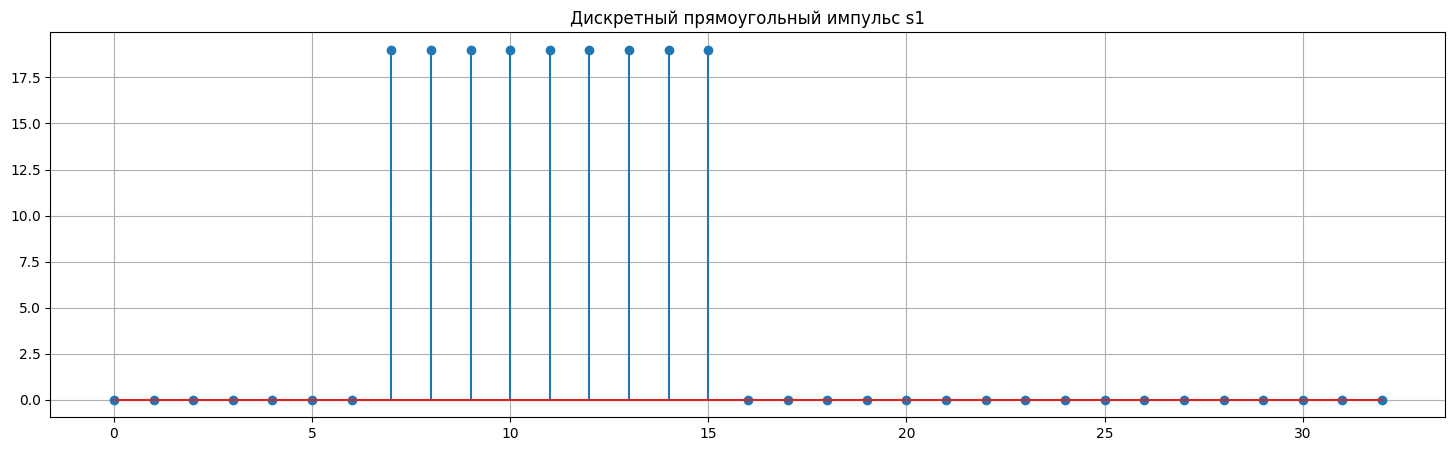

In [4]:
plt.figure(figsize=(18, 5))
plt.stem(interval_n, square_pulse(interval_n))
plt.title("Дискретный прямоугольный импульс s1")
plt.grid()
plt.show()

Прямоугольный дискретный импульс создается из двух единичных скачков с одинаковой амплитудой. Вычитание одного сигнала из другого обнуляет временную область после $n_0+n_{imp}$, сохраняя прямоугольный импульс в нужной области.
$$s_1(k)=U\cdot (\sigma_d (k-n_0) - \sigma_d (k-n_0-n_{imp}))$$

**2. Моделирование линейной комбинации дискретных гармонических сигналов $s_2(k)$, где $x_i(k) = B_i\sin(\hat\omega_i k)$, $i = 1,2,3$, с выводом графиков на интервале времени $n \in [0, 5N - 1]$.**

In [5]:
def x1(x):
  return B1*np.sin(w1*x)

def x2(x):
  return B2*np.sin(w2*x)

def x3(x):
  return B3*np.sin(w3*x)

In [6]:
interval_5n = np.arange(5*N-1)

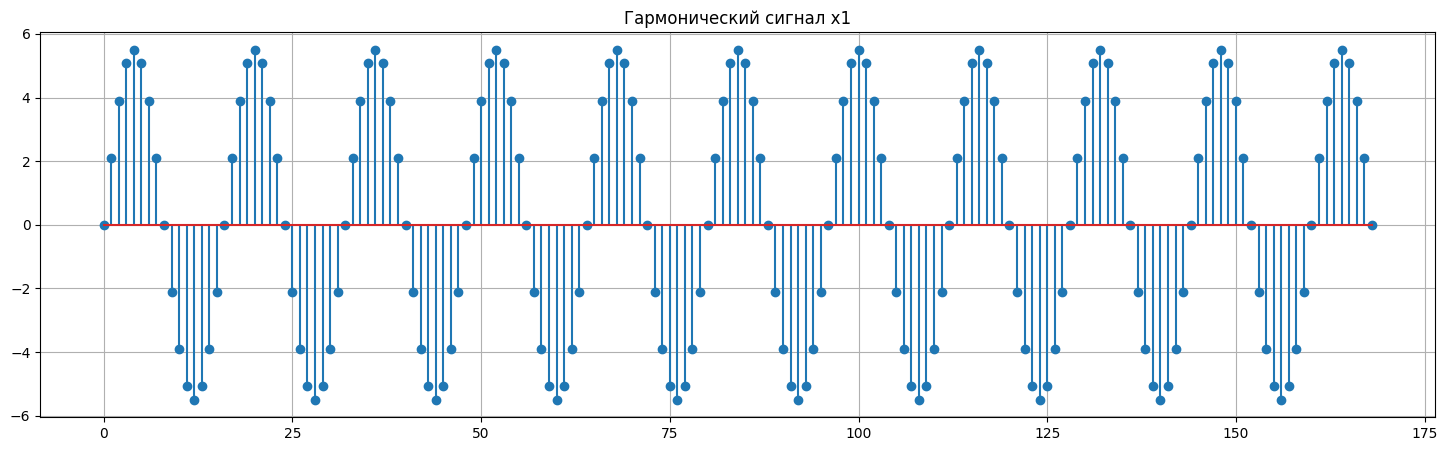

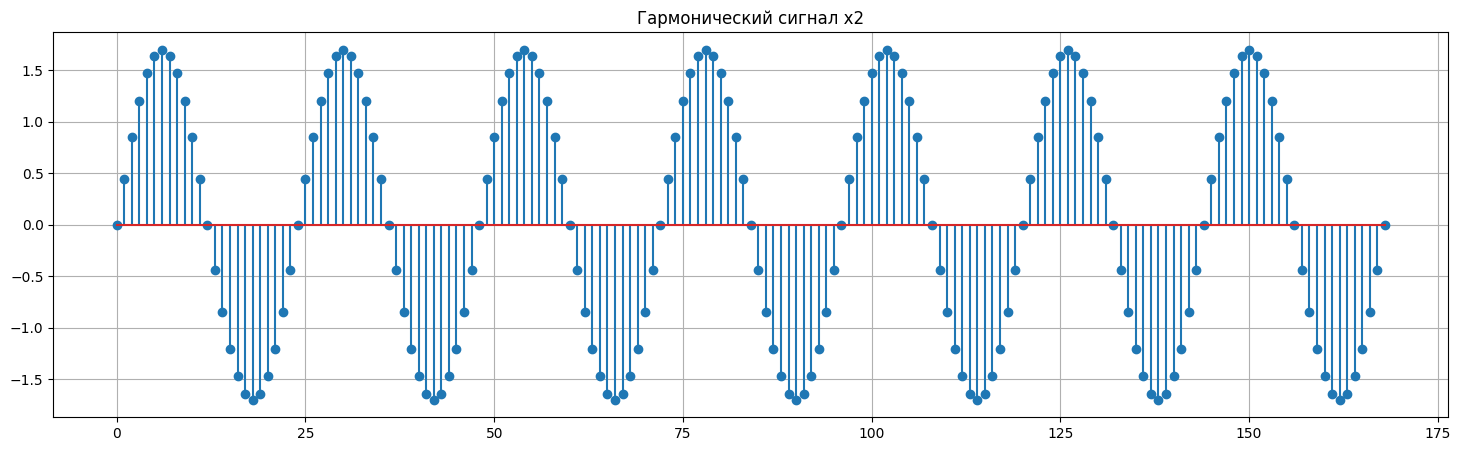

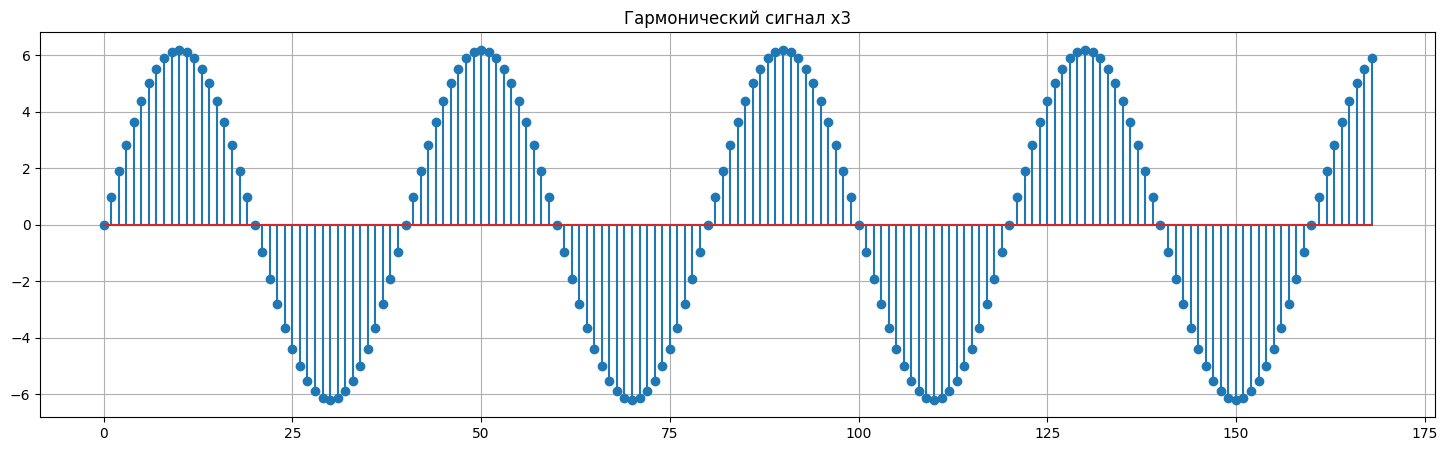

In [7]:
plt.figure(figsize=(18, 5))
plt.stem(interval_5n, [x1(i) for i in interval_5n])
plt.title("Гармонический сигнал x1")
plt.grid()
plt.show()

plt.figure(figsize=(18, 5))
plt.stem(interval_5n, [x2(i) for i in interval_5n])
plt.title("Гармонический сигнал x2")
plt.grid()
plt.show()

plt.figure(figsize=(18, 5))
plt.stem(interval_5n, [x3(i) for i in interval_5n])
plt.title("Гармонический сигнал x3")
plt.grid()
plt.show()

In [8]:
def s2(k):
  return a1 * x1(k) + a2 * x2(k) + a3 * x3(k)

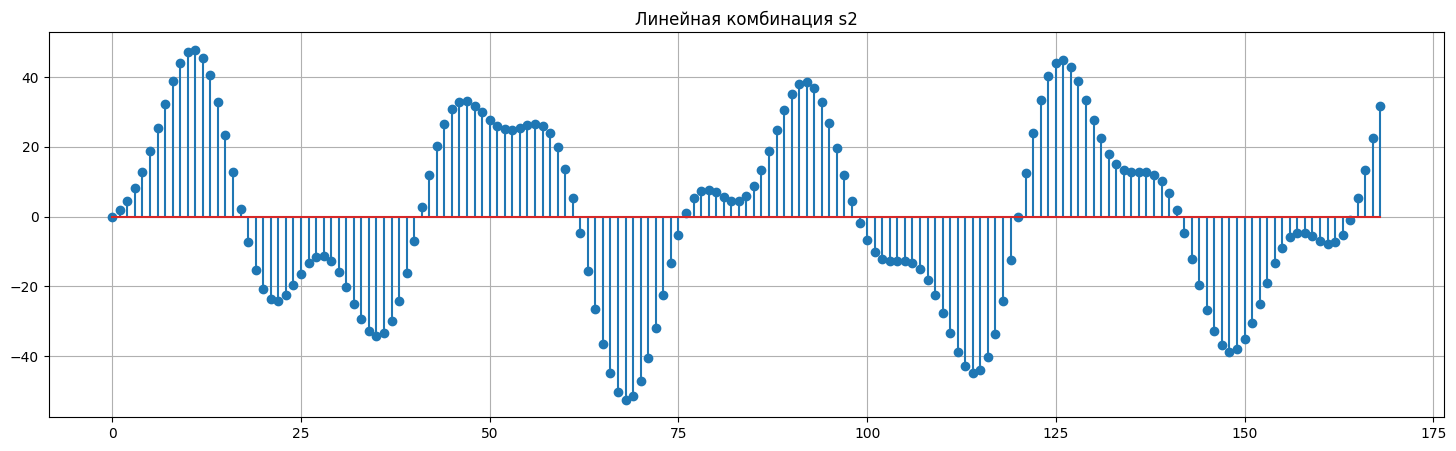

In [9]:
plt.figure(figsize=(18, 5))
plt.stem(interval_5n, [s2(i) for i in interval_5n])
plt.title("Линейная комбинация s2")
plt.grid()
plt.show()

In [ ]:
mean_s2 = sum([s2(k) for k in interval_5n]) / (5*N)
E = sum([s2(k)**2 for k in interval_5n])
P = E / (5*N)

print('Среднее значение (mean_s2) = {}\nЭнергия (E) = {}\nСредняя мощность (P) = {}'.format(mean_s2, E, P))

Среднее значение (mean_s2) = 0.5515773154335817
Энергия (E) = 109215.81770706183
Средняя мощность (P) = 642.4459865121283


A. Для определения значения $s_2(t)$ в определенный момент времени $t$ необходимо вычислить значения $x_1(t), x_2(t), x_3(t)$, умножить их на соответствующие коэффициенты и сложить полученные произведения.

B. Характеристики:

Среднее значение:
$$M=\frac{\sum\limits_{i=0}^{5\cdot N-1} s_2(i)}{5\cdot N}=0.552$$
Энергия:
$$E=\sum\limits_{i=0}^{5\cdot N-1} s_2^2(i)=109215.818$$
Средняя мощность:
$$P=\frac{E}{5\cdot N}=642.446$$


**3. Визуализация дискретного сигнала $s_3(k)$, представляющего собой дискретный гармонический сигнал $s(k)$ с экспоненциальной огибающей $|a|^k$, на интервале времени $n \in [0, N-1]$.**

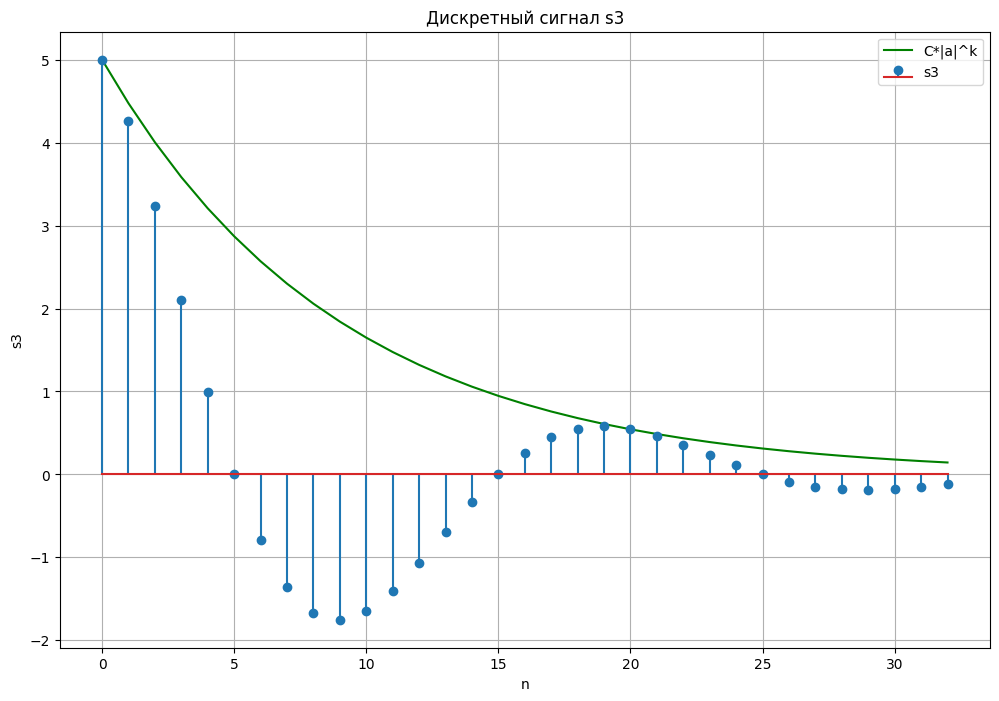

In [10]:
def s(k):
  return C * np.cos(w0 * k)

def s3(k):
  return s(k) * np.abs(a)**k

plt.figure(figsize=(12, 8))

plt.plot(C*np.abs(a)**interval_n, label='C*|a|^k', color='green')
plt.stem(interval_n, [s3(i) for i in interval_n], label='s3')
plt.title('Дискретный сигнал s3')
plt.xlabel('n')
plt.ylabel('s3')

plt.legend()
plt.grid()
plt.show()

Аналитическое представление сигнала $s_3$ описывается формулой:
$$s_3(k) = C \cdot |a|^k \cdot cos(\hat{ω}_0k)$$

Формула сигнала формируется путем умножения гармонического сигнала $C cos (\widehat{\omega}_0 k)$ на экспоненциальную огибающую $|a|^k$.

Графическое представление демонстрирует, как значения сигнала меняются под влиянием огибающей.

**4. Визуализация пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса.**

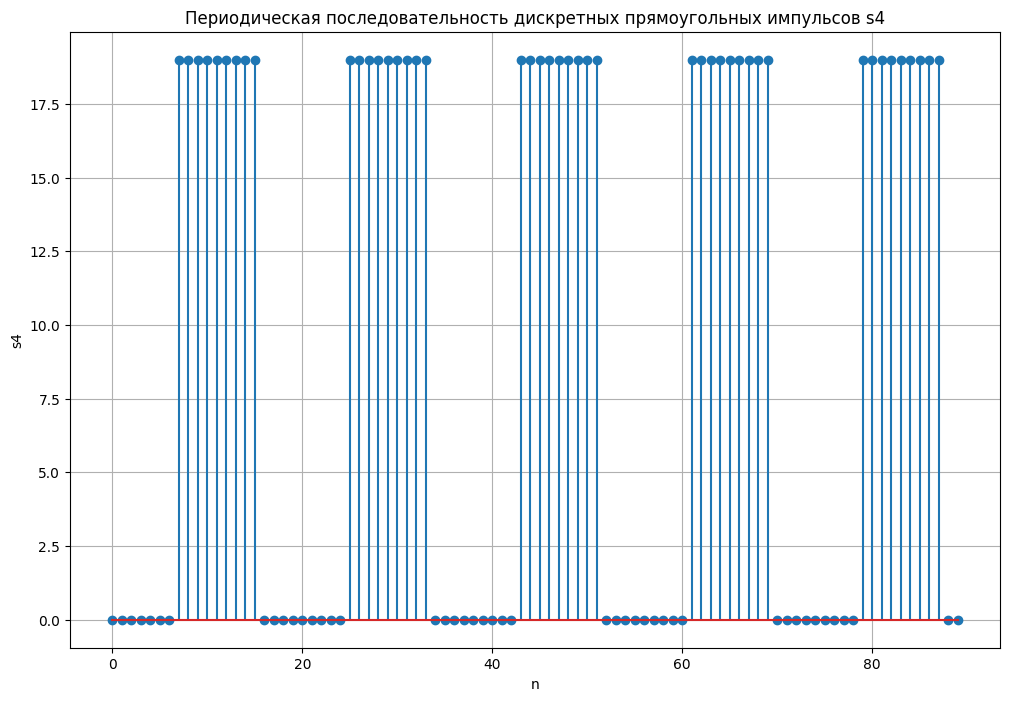

In [11]:
T = n_imp*2
interval_T = np.arange(5*T)

def s4(k, T, N):
  return sum([s1(k-i*T) for i in range(0, N)])

plt.figure(figsize=(12, 8))

plt.stem(interval_T, [s4(i, T, 5) for i in interval_T])
plt.title('Периодическая последовательность дискретных прямоугольных импульсов s4')
plt.xlabel('n')
plt.ylabel('s4')
plt.grid()
plt.show()

Моделирование $N$ прямоугольных импульсов с периодом $T$ можно охарактеризовать формулой:

$$s_4(k) = \sum\limits_{i=0}^{N-1} s_1(k-iT)$$

Эта формула означает, что $N$ отдельно сгенерированных импульсов с уникальной задержкой суммируются на временной оси, образуя таким образом периодическую последовательность $s_4(k)$.

## Выводы

В процессе выполнения практической работы было исследовано математическое представление линейных комбинаций дискретных гармонических сигналов, а также проведено моделирование этих сигналов.

Мы создали модели для различных типов дискретных сигналов, включая дискретные прямоугольные импульсы, дискретные гармонические сигналы, и их линейные комбинации. Графики соответствующих сигналов были построены на интервалах дискретного времени, и также были вычислены их средние значения, энергия и средняя мощность.

Эксперимент показал, что сигналы, используемые для создания линейных комбинаций, влияют на форму результирующего сигнала, а линейные коэффициенты определяют изменения амплитуд этих сигналов. Также было отмечено, что в качестве коэффициентов можно использовать другие сигналы, что может определять огибающие формы сигналов.